In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from numpy import linalg as la
import sys
import matplotlib.pyplot as plt
import seaborn as sas

In [62]:
data_folder = Path("dataset/experiment-i/S1/")

file_name = data_folder / "1.txt"
df = pd.read_csv(file_name, sep="\t", header=None)
#la stessa posizione viene misurata 82 volte DC
#la prima non conta un cazzo(è vuota), anche l'ultima colonna è 8vuota dc
#dobbiamo fare la PCA tra le 82 misurazioni diverse boia
#e poi cercare di tenere quella più carina dc
df.drop(columns=[2048], inplace = True) #tolgo colonna
df.drop(0, inplace = True) #tolgo riga
df.drop(1, inplace = True) #tolgo riga
df.drop(2, inplace = True) #tolgo riga

df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
3,0,0,0,0,1,0,5,4,5,2,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,6,4,5,1,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,5,4,4,1,...,3,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,5,4,4,1,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,6,4,4,1,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,0,0,0,0,0,3,0,3,0,...,3,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,3,0,2,0,...,1,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,1,0,2,0,...,2,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,1,0,3,0,...,2,0,0,0,0,0,0,0,0,0


In [63]:
array = df.to_numpy()
#avg = array.mean()
avg = np.mean(array, axis = 1, keepdims=True)

print(avg.shape)
array = array - avg

CX = np.cov(array)
w,v = la.eig(CX) 

CY =  np.diag(np.round(np.real(w),2))
print("Trace of the original data matrix: " , np.round(CX.trace(),2))
print("Trace of the data matrix after the changes of base: ", np.round(CY.trace(),2), "\n")

tr = 0;
for i in range(0,len(CY)):
    tr = tr + CY[i,i]
    print("Fraction of the total variability keeping only the first principal component: ", np.round(100*tr/CY.trace()),"%")


P = v[:,0:1]
print(P.shape)
P = abs(P)

array_final = P.T.dot(array)

(79, 1)
Trace of the original data matrix:  406009.65
Trace of the data matrix after the changes of base:  406009.68 

Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of the total variability keeping only the first principal component:  100.0 %
Fraction of

In [64]:
array_final[0] = array_final[0]
array_final[0][array_final[0] < 0] = 0
array_final[0][array_final[0] > 5000] = 1000

OldRange = array_final[0].max()  
NewRange = 1000 
for i in range(0,len(array_final[0])):
    array_final[0][i] = (((array_final[0][i]) * NewRange) / OldRange) 

file = open("prova1.txt", "w") 

for i in range(0,len(array_final[0])):
    l = i + 1;
    if(l%32 != 0):
        file.write(str(int(array_final[0][i])) + "\t") 
    else:
        file.write("\n") 
        
        
file.close() 

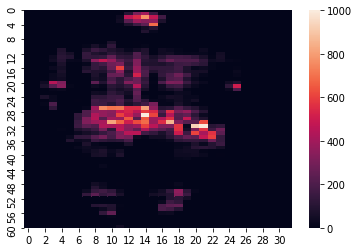

In [65]:
sas.heatmap(array_final[0].reshape(64,32))

In [66]:
tmp = array_final[0]
tmp = np.reshape(tmp,(64,32))

X = []

#build a vector for each point 
#every vector contains the coordinates and the intensity values of the shape of the body
for i in range(0, tmp.shape[0]):
    for j in range(0, tmp.shape[1]):
        t = []
        if tmp[i][j] == 0:
            continue
        else:
            t.append(i)
            t.append(j)
            t.append(tmp[i][j])
            X.append(t)

X = np.array(X)


In [67]:
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [68]:
center = [(6.5,15.5,500),(21.5,15.5,500),(38.,15.5,500),(55.,15.5,500)]
#center = [(6.5,15.5,500),(21.5,15.5,500),(55.,15.5,500)]
center = np.array(center)
km = km(n_clusters=4).fit(X_std)
#km = km(n_clusters=4, init = center).fit(X_std)
km.labels_

y_km = km.predict(X_std)

o = km.cluster_centers_
print(o)
o = scaler.inverse_transform(o)
print(o)

[[-0.0381194   0.02900108  1.7912026 ]
 [-0.57109423 -0.90599415 -0.29844707]
 [-0.27110274  1.00824301 -0.42722505]
 [ 1.56650604 -0.24272939 -0.45093179]]
[[ 26.58823529  13.67647059 493.63883865]
 [ 19.45698925   8.70967742 120.72895121]
 [ 23.47089947  18.87830688  97.74778688]
 [ 48.05825243  12.23300971  93.51718468]]


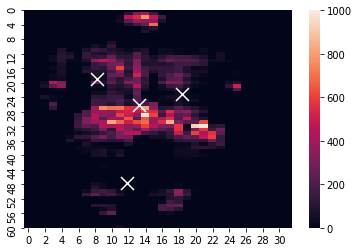

In [69]:
sas.heatmap(array_final[0].reshape(64,32))
plt.scatter(o[:,1], o[:,0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)



[[ 6.5 15.5]
 [21.5 15.5]
 [38.  15.5]
 [55.  15.5]]


/home/giovanni/.local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


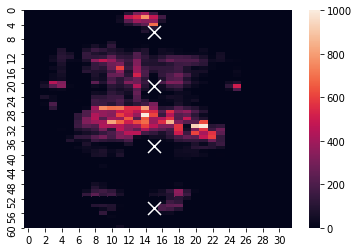

In [44]:
import sklearn.preprocessing as pre
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler

tmp = array_final[0]
tmp = np.reshape(tmp,(64,32))

X = []

#build a vector for each point 
#every vector contains the coordinates and the intensity values
for i in range(0, tmp.shape[0]):
    for j in range(0, tmp.shape[1]):
        t = []
        t.append(i)
        t.append(j)
        X.append(t)

X = np.array(X)

center = [(0,0),(16,0),(37,0),(64,0)]
center = np.array(center)
#km = km(n_clusters=4).fit(X)
km = km(n_clusters=4, init = center).fit(X)
km.labels_

y_km = km.predict(X)

o = km.cluster_centers_
print(o)

sas.heatmap(array_final[0].reshape(64,32))
plt.scatter(o[:,1], o[:,0], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
